# Ejercicio 1 a
Código basado en los siguientes tutoriales:
- [Image Segmentation Using Color Spaces - Whales](https://www.kaggle.com/sanikamal/image-segmentation-using-color-spaces)
- [Image Segmentation Using Color Spaces in OpenCV + Python - Nemo](https://www.kaggle.com/sanikamal/image-segmentation-using-color-spaces)

In [ ]:
import cv2

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [ ]:
len(flags)

274

In [ ]:
flags[40]

'COLOR_BGR2HLS'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# Segmentation of Nemo

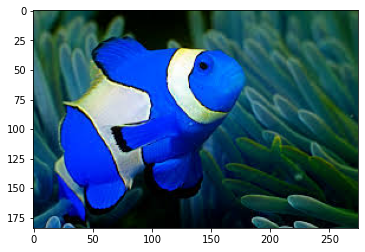

In [ ]:
nemo = cv2.imread('../resources/nemo.jpg')
plt.imshow(nemo)
plt.show()

OpenCV lee por defecto las imagenes en BGR, por lo cual es necesario una conversión a RGB para poder visualizarla correctamente

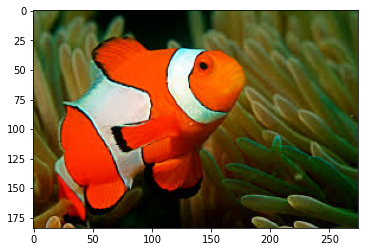

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

En el espacio de color RGB, se grafica la distribución de pixels en estas tres coordenadas, en las cuales, por ejemplo, un pixel rojo tendrá coordenadas (255, 0, 0), y uno negro tendrá (0, 0, 0).

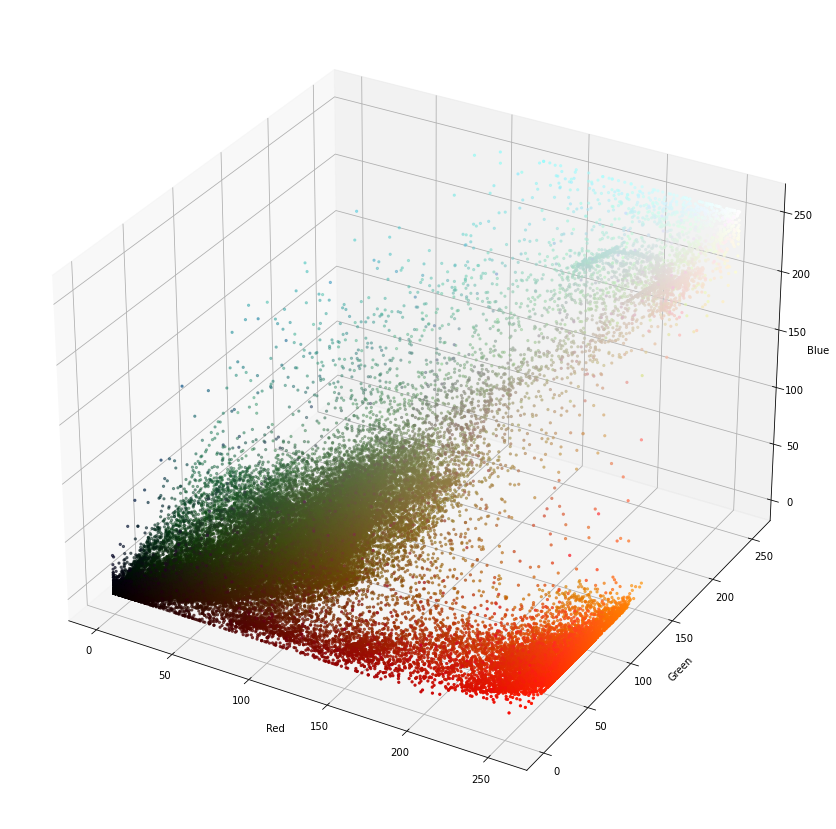

In [ ]:
# Splitting components of image
r, g, b = cv2.split(nemo)

# Creating Figure for 3D plot
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection='3d')

# Normalising list of pixels
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Plotting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Este espacio, si bien es más sencillo de comprender para la mayoría de las personas, y es ampliamente utilizado para la representación de colores en los pixels de pantallas (o mismo por la librería `matplotlib`), no es el más util para segmentar un color en particular. Por eso convertimos la imagen al espacio HSV, en el cual Hue nos da el color que se está utilizando (llámese su longitud de onda), Saturation la intensidad del color (S=0 genera una imagen blanco y negro), y Value el "brillo" del pixel (a menor valor, el pixel es más oscuro y cerca del negro, a mayor valor, más claro y blanco).

## HSV Colour Space
<img src="../resources/HSV_color_space.png">

In [ ]:
# Convert the image from RGB to HSV
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

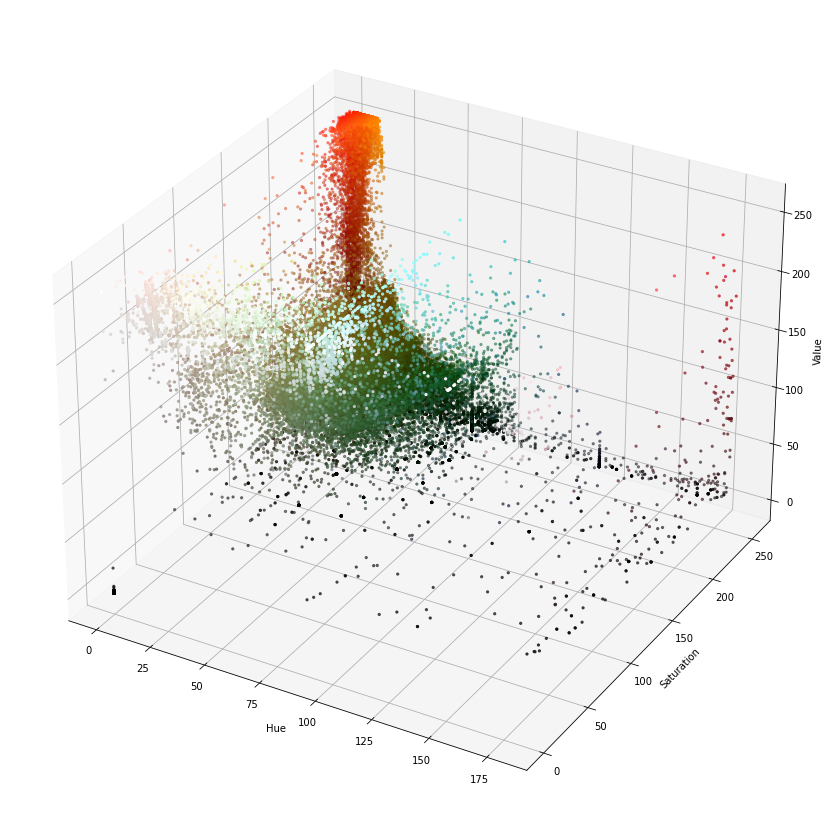

In [ ]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Comparando este gráfico con el del espacio RGB, ahora podemos delimitar mucho mejor un volumen del mismo donde quedan bien contenidos los tonos de naranja, que son en definitiva los que queremos aislar para aislar a nuestro Nemo. Esa es la gran ventaja del espacio HSV, la capacidad de delimitar mejor un rango de colores con los que uno quiere quedarse.

In [ ]:
# Thresholds for segmenting Nemo
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [ ]:
# Segmenting Nemo according to thresholds, using a mask
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
segmented_nemo = cv2.bitwise_and(nemo, nemo, mask=mask)

Se grafican la máscara lograda y su resultado al aplicarla en la imagen de Nemo.

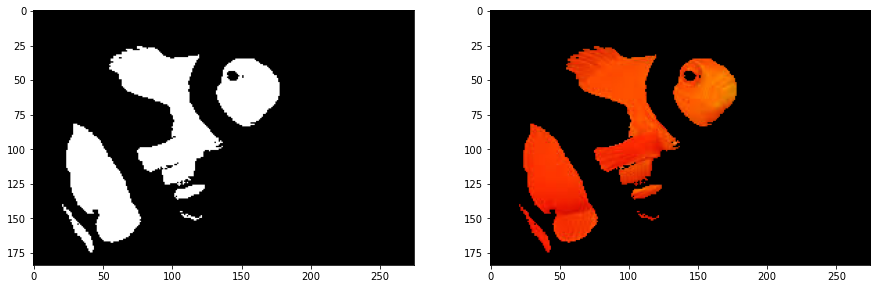

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(segmented_nemo)
plt.show()

Se crea tambien una máscara para las tonalidades blancas de las rayas de Nemo.

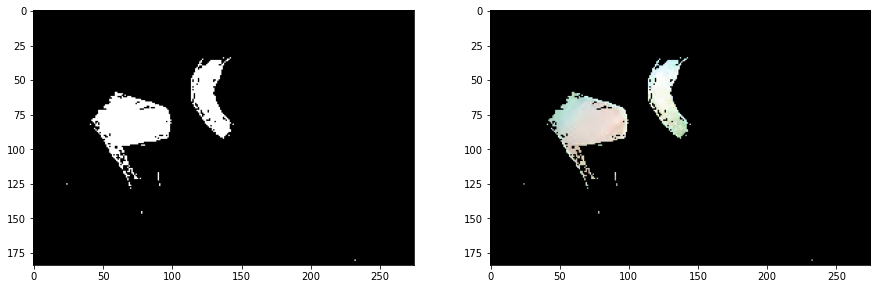

In [ ]:
# Segmenting white stripes of Nemo
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

Con ambas máscaras, se obtiene la segmentación completa de Nemo.

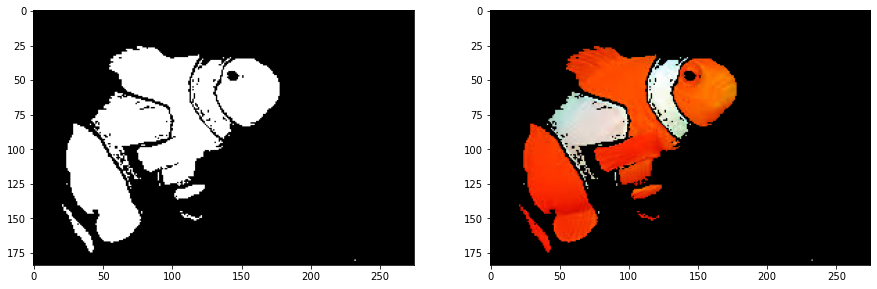

In [ ]:
# Segmenting both white and orange parts of Nemo
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

Sin embargo, los puntos negros que aparecen (sobre todo en las rayas blancas de Nemo) no son un efecto deseado, y para reducirlos, se aplica un pasa-bajos gausseano para promediar estos puntos y obener algo más continuo,

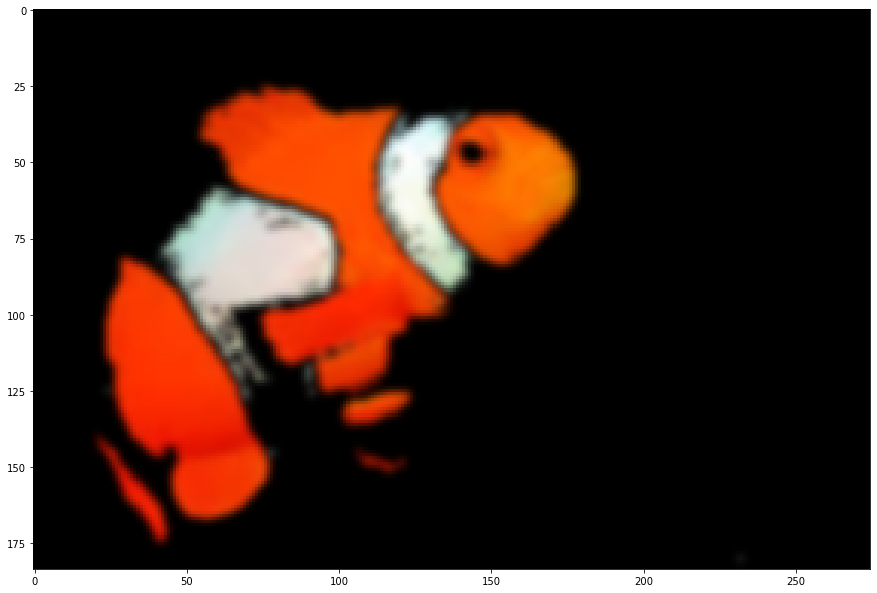

In [ ]:
# Blurring to smoothen dark dots in the middle of Nemo
blur = cv2.GaussianBlur(final_result, (7, 7), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur)
plt.show()